<a href="https://colab.research.google.com/github/BrianChegeGichau/Adanalysis/blob/master/CustomerAdAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Understanding the Question

**Customer Segmentation**


Am working as a Data Scientist consultant for a Kenyan Entrepreneur who needs to identify clients who can click her ads. The business involves teaching individuals on cryptography through an online platform. Her audiences are from various countries. She ran an ad on a related course and collected data in the process which we will be analyzing in this notebook.

# Objective of the Study

The main objectives of this study is:

*   Find and deal with outliers, anomalies, and missing data within the dataset.
*   Perform Univariate and Bivariate Analysis.
*   Get insights from the data.
*   Provide a comprehensive conclusion and recommendation.



# Metric for Success

The following are what will determine the success of my study:


*   To get insight from all the variables in our dataset.
*   Provide recommendations on their appropriateness of solving the given problem.



# The Experimental Design

The following are the steps that will be taken during the study:


*   Importing, installing and loading the needed R packages.
*   Reading and exploring the dataset.
*   Finding and dealing with outliers, anomalies and missing data within the dataset.
*   Perform Univariate and Bivariate Analysis.
*   Provide a recommendation and a conclusion drawn from the analysis done.



# 2. Importing, Installing and loading the R packages.

In [ ]:
#Installing the data table package
install.packages("data.table", dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘R.oo’, ‘R.methodsS3’, ‘RcppCCTZ’, ‘RcppDate’, ‘bit64’, ‘R.utils’, ‘xts’, ‘nanotime’, ‘zoo’




In [ ]:
#Installing the visualization package;ggplot2 and the corrplot
install.packages("ggplot2", dependencies=TRUE)
install.packages("corrplot", dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘matrixStats’, ‘RcppArmadillo’, ‘e1071’, ‘fontBitstreamVera’, ‘fontLiberation’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘sp’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘classInt’, ‘units’, ‘diffobj’, ‘fontquiver’, ‘freetypeharfbuzz’, ‘shiny’, ‘ggplot2movies’, ‘hexbin’, ‘Hmisc’, ‘mapproj’, ‘maps’, ‘maptools’, ‘multcomp’, ‘profvis’, ‘quantreg’, ‘rgeos’, ‘sf’, ‘vdiffr’


Warning message in install.packages("ggplot2", dependencies = TRUE):
“installation of package ‘units’ had non-zero exit status”
Warning message in install.packages("ggplot2", dependencies = TRUE):
“installation of package ‘rgeos’ had non-zero exit status”
Warning message in install.packages("ggplot2", dependencies = TRUE):
“installation of package ‘sf’ had non-zero exit status”
Inst

In [ ]:
#Loading the package libraries on our notebook.
library(data.table)
library(corrplot)
library(ggplot2)

corrplot 0.84 loaded



#  3. Reading and Exploring the Dataset

In [ ]:
#Loading the dataset in our notebook and previewing the top rows in the dataset
df <- fread('advertising.csv')
head(df)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


The dataset has a sum of 10 columns. All the columns are in their correct formats save for the Timestamp which has a character datatype. This will need to be changed so as to extract some data from it.

# 4. Cleaning the Dataset

In [ ]:
#Changing the Column names to my preferred system.
df = setnames(df, 'Male','Gender')
df = setnames(df, 'Daily Time Spent on Site','Time_Spent_on_Site')
df = setnames(df, 'Area Income','Area_Income')
df = setnames(df, 'Daily Internet Usage','Daily_Internet_Usage')
df = setnames(df, 'Clicked on Ad','Clicked_on_Ad')

In [ ]:
#Since the Gender column had been encoded I changed it to the right representative format
df$Gender = as.character(df$Gender)
df$Gender <- recode(df$Gender , "1" = "Male", "0" = "Female" )

In [ ]:
#Changing the Timestamp data type
df$Timestamp <- as.Date(df$Timestamp)
head(df)

Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked_on_Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,2016-03-27,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,2016-04-04,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,2016-03-13,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,2016-01-10,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,2016-06-03,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,Male,Norway,2016-05-19,0


The Timestamp data type is now changed to a date format.

In [ ]:
#Checking the missing values in our columns
colSums(is.na(df))

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

There are no missing values in all our columns.

In [ ]:
#Checking fro duplicated rows in our columns
duplicated_rows <- df[duplicated(df),]
duplicated_rows

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>


There are no duplicated rows in our dataset.

In [ ]:
#Defining the numerical columns in our dataset for checking for outliers.
time <- df$`Daily Time Spent on Site`
age <- df$Age
income <- df$`Area Income`
internet <- df$`Daily Internet Usage`

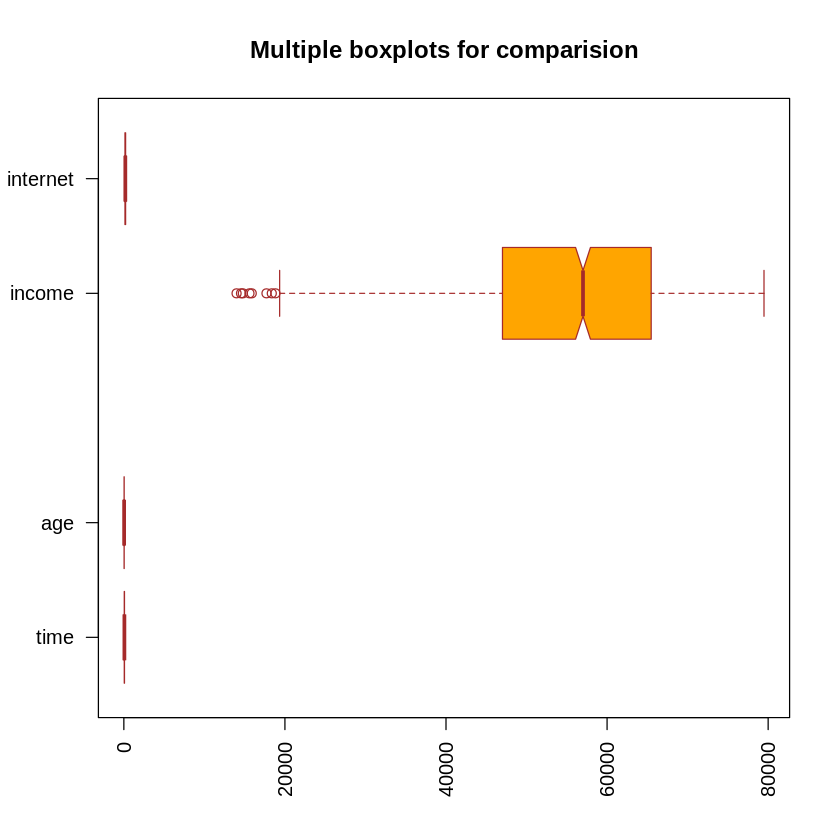

In [ ]:
#Checking for outliers in our numerical columns
boxplot(time, age, income, internet,
main = "Multiple boxplots for comparision",
at = c(1,2,4,5),
names = c("time", "age", "income", "internet"),
las = 2,
col = c("orange","red"),
border = "brown",
horizontal = TRUE,
notch = TRUE
)

Key take aways:


*   The Daily Time Spent on Site, the Age and the Daily Internet usage column do not have outliers. 
*   The Area income variable does have outliers. Given the vast nature of the income possibilies in an area it would be unwise to drop outliers in this column. Hence I will not drop outliers. 



I also decided to change the Male column name to Gender for 1 to represent the Males, and 0 to represent the Females.

# 5. Feature Engineering

I decided to split the Timestamp column into Year, Month and Day columns to visualize analyze the peak month and peak days.

In [ ]:
#Importing the necessary library for splitting the dataset.
library(tidyr)

In [ ]:
#Separating our Time stamp column into Year, Month and day.
df = separate(df, "Timestamp", c("Year", "Month", "Day"), sep = "-")

I decided to drop the Ad Topic Line column since it did not have much information to be extracted from as of now. I also decided to drop the Year column since the data collection occured in the Year 2016 alone.

In [ ]:
#Dropping the Ad Topic line column and the Year column.
df = df[, c("Ad Topic Line","Year"):=NULL] 

In [ ]:
#Previewing the first few rows in our data table.
head(df)

Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,City,Gender,Country,Month,Day,Clicked_on_Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Wrightburgh,Female,Tunisia,03,27,0
80.23,31,68441.85,193.77,West Jodi,Male,Nauru,04,04,0
69.47,26,59785.94,236.50,Davidton,Female,San Marino,03,13,0
74.15,29,54806.18,245.89,West Terrifurt,Male,Italy,01,10,0
68.37,35,73889.99,225.58,South Manuel,Female,Iceland,06,03,0
59.99,23,59761.56,226.74,Jamieberg,Male,Norway,05,19,0


# 5. Data Exploration

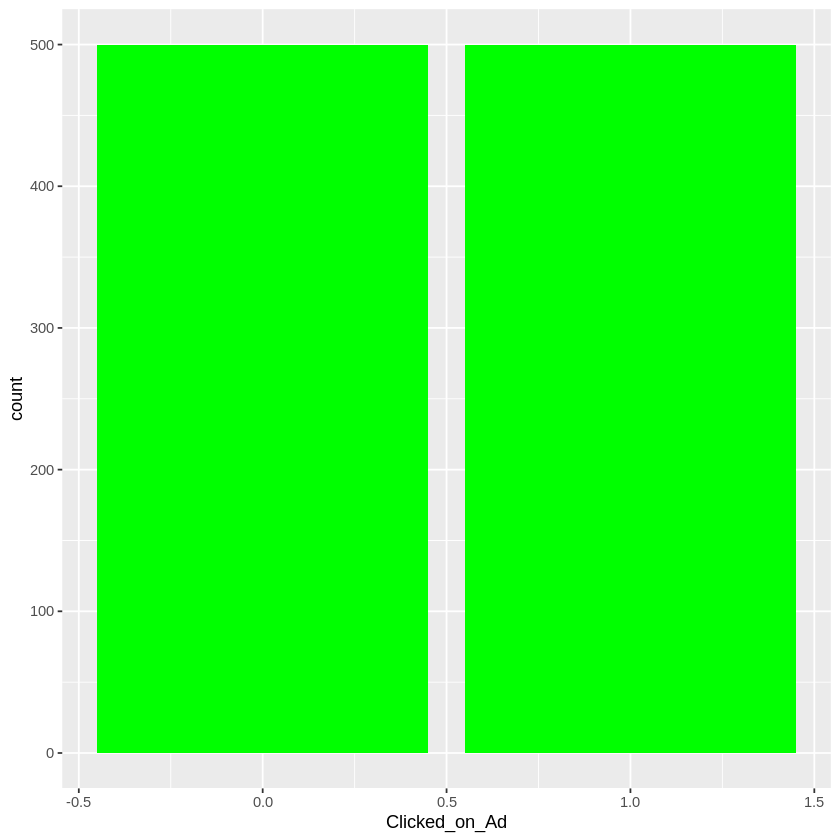

In [ ]:
#Visualzing the number of clicked ads and no clicked ads in our dataset.
ggplot(df, aes(Clicked_on_Ad)) + 
  geom_bar(fill = "green")

There was an equal umber of clicked ads and no clicked ads in our dataset.

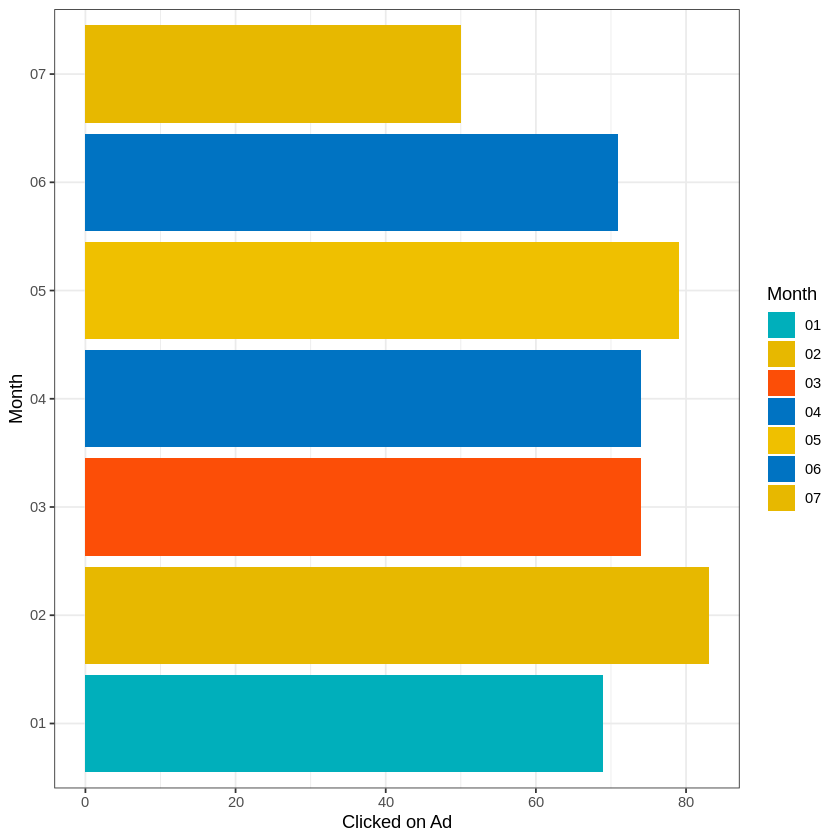

In [ ]:
#Finding out the month with the most clicked ads
a <- ggplot(df, aes(x = `Clicked on Ad`, y = `Month`))

a + geom_col(aes(fill = `Month`)) +
  scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07","#0073C2FF", "#EFC000FF","#0073C2FF","#E7B800"))

Key points:


*   February and May had the most clicked ads.
*   July had the least clicked ads. 
*   March and April had almost the same clicked ads.



In [ ]:
#Grouping by top ten days that had the most clicked ads
day <- df %>% 
  group_by(Day) %>%
  summarise(n=sum(Clicked_on_Ad, na.rm=TRUE)) %>%
  arrange(desc(n))%>%
  head(10)

`summarise()` ungrouping output (override with `.groups` argument)



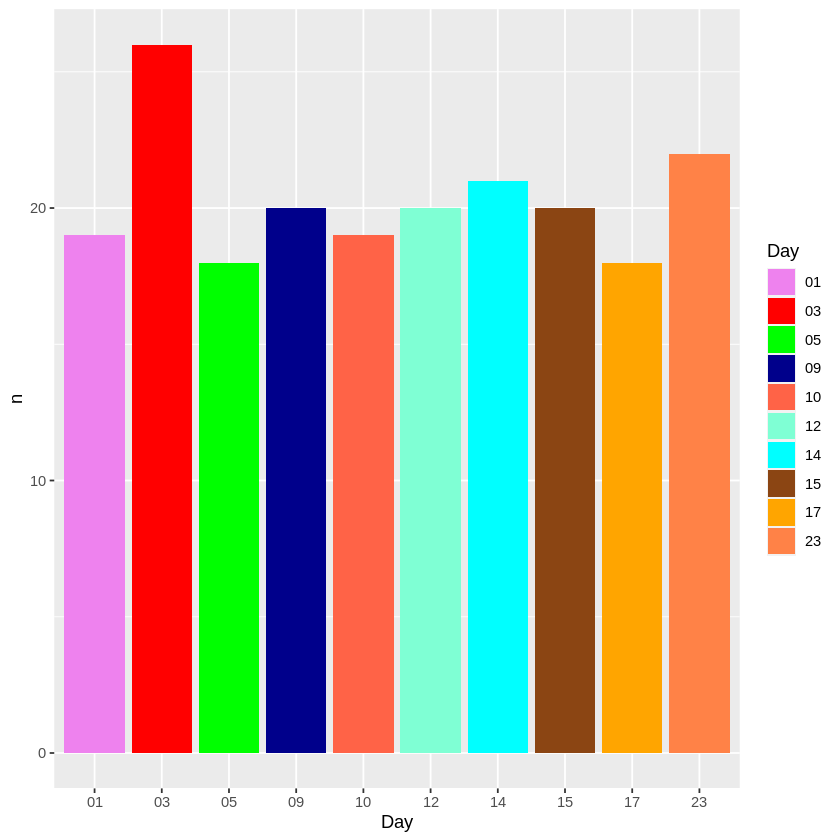

In [ ]:
#Visualizing the days with the most clicked ads.
z <- ggplot(day, aes(x = `Day`, y = n))

z + geom_col(aes(fill = `Day`)) +
  scale_fill_manual(values = c("violet", "red","green","darkblue","tomato","aquamarine","cyan","chocolate4","orange","sienna1"))

The following days experienced the most clicked ads:


*   The 3rd day of the month
*   The 23rd Day of the month
*   The 14th day of the month
*   The 9th day of the month.
*   The 12th day of the month.



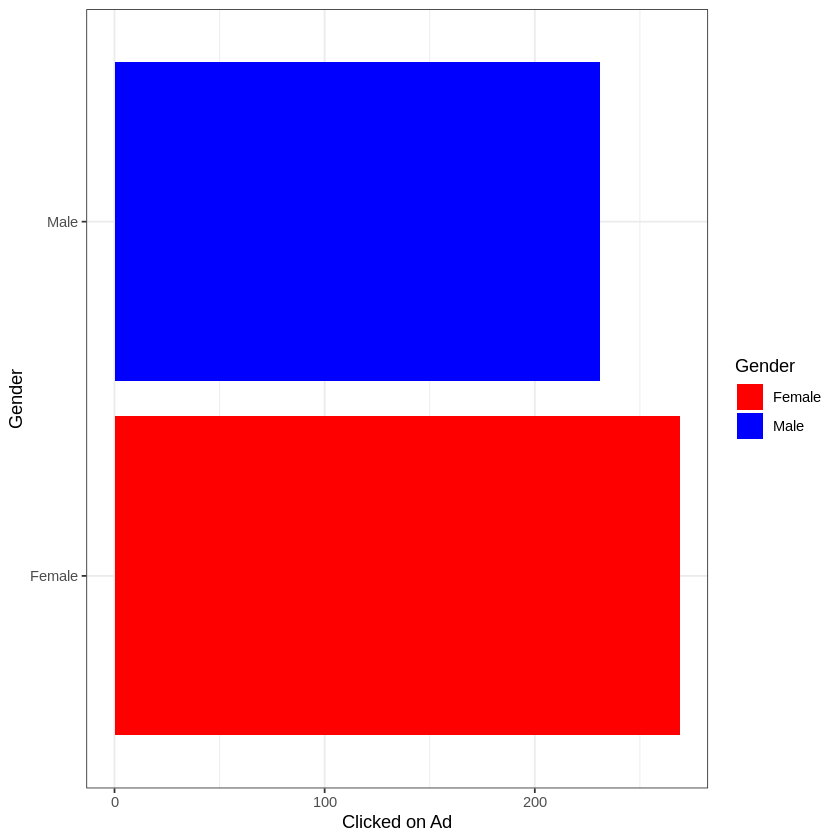

In [ ]:
#Displaying the Gender that were most likely to click the ads.
b <- ggplot(df, aes(x = `Clicked on Ad`, y = `Gender`))

b + geom_col(aes(fill = `Gender`)) +
  scale_fill_manual(values = c('red', 'blue'))

Females were most likely to click the ads compared to Males. 

I also wanted to find out the Gender that spent the most time daily on the site.

In [ ]:
#Grouping the Gender by the Daily Time Spent on the Site
time_spent <- df %>% 
  group_by(Gender) %>%
  summarise(n=sum(Time_Spent_on_Site, na.rm=TRUE))

`summarise()` ungrouping output (override with `.groups` argument)



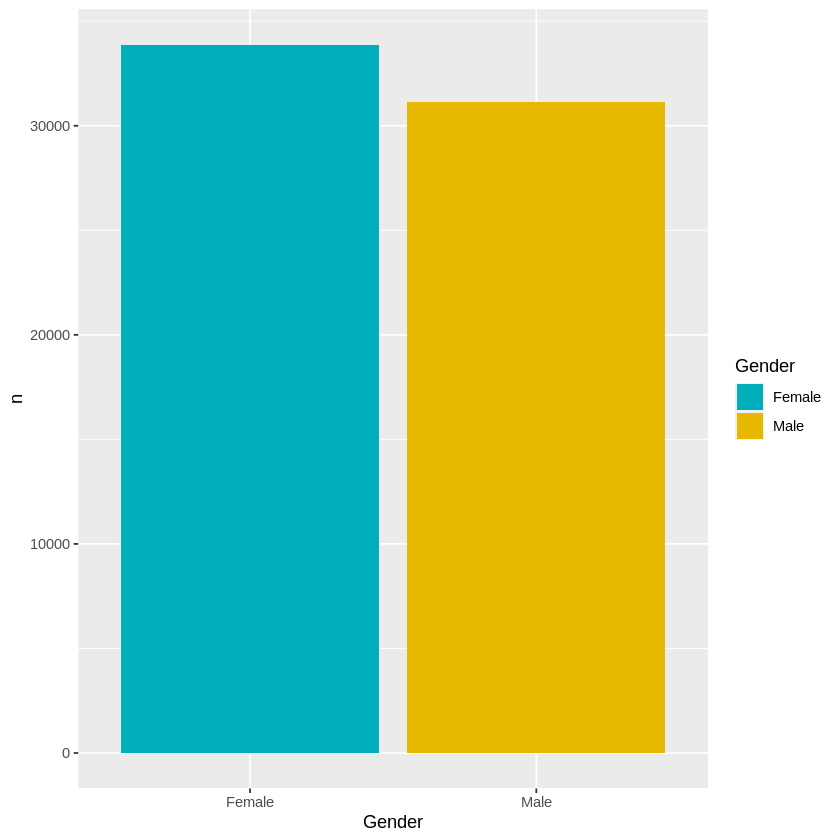

In [ ]:
#Plotting the the two groups.
e <- ggplot(time_spent, aes(x = `Gender`, y = n))

e + geom_col(aes(fill = `Gender`)) +
  scale_fill_manual(values = c("#00AFBB", "#E7B800"))

Females spent more time daily on the Site more than the males.

I also wanted to find out the Daily Time Spent per Site per country.

In [ ]:
#Grouping the Country by the Daily Time spent on site.
country <- df %>% 
  group_by(Country) %>%
  summarise(n=sum(Time_Spent_on_Site, na.rm=TRUE)) %>%
  arrange(desc(n))%>%
  head(10)

`summarise()` ungrouping output (override with `.groups` argument)



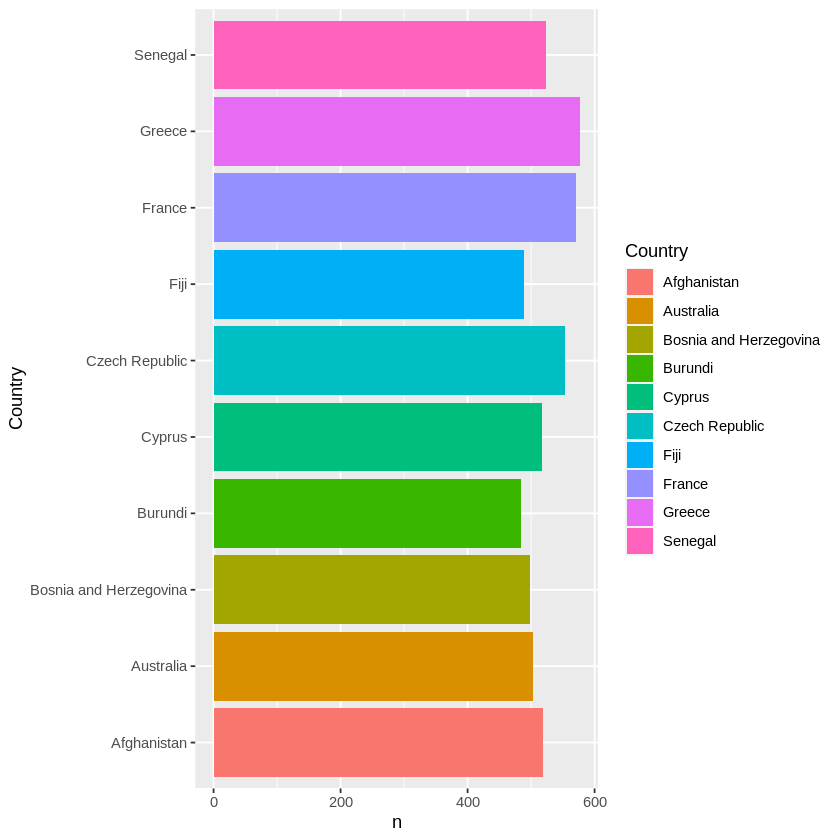

In [ ]:
#Viewing the countries with the spending the most time on the site.
f <- ggplot(country, aes(x = n, y = `Country`))

f + geom_col(aes(fill = `Country`)) 

There is more time being spent on the site in these countries:

*   Greece
*   France
*   Czech Republic
*   Senegal
*   Afghanistan





In [ ]:
#Grouping the Daily time spent on site by the cities.
city <- df %>% 
  group_by(City) %>%
  summarise(n=sum(Time_Spent_on_Site, na.rm=TRUE)) %>%
  arrange(desc(n))%>%
  head(10)

`summarise()` ungrouping output (override with `.groups` argument)



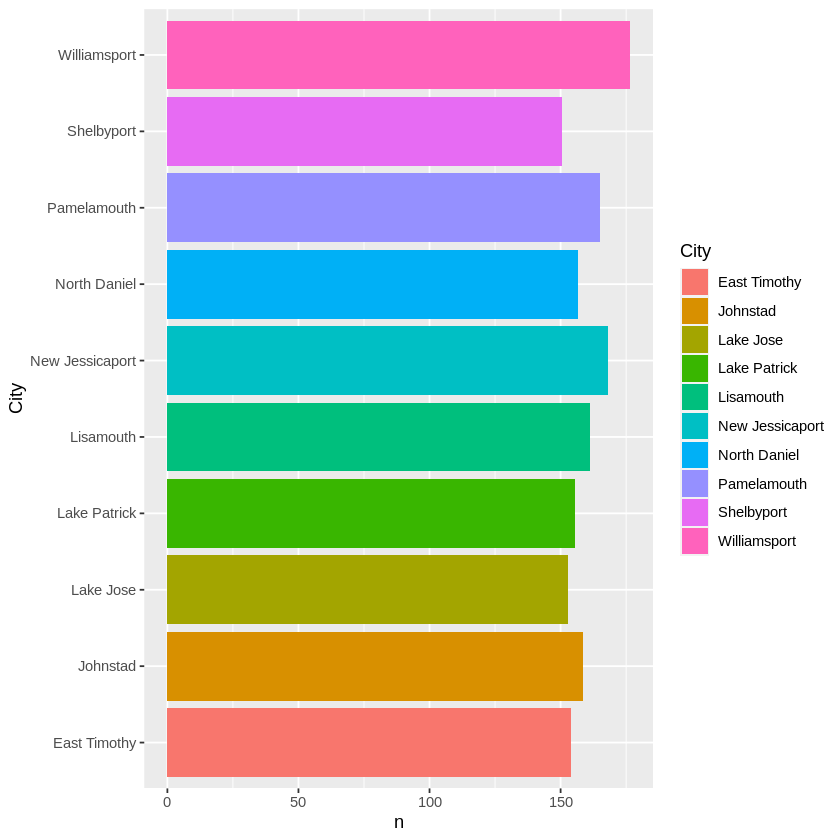

In [ ]:
#Viewing the highest daily time spent on the site in the countries.
g <- ggplot(city, aes(x = n, y = `City`))

g + geom_col(aes(fill = `City`)) 

More daily time in spent on the site in the following cities respectively:


*   Williamsport
*   New Jessicaport
*   Pamelamouth
*   Lisamouth
*   Johnstad



In [ ]:
#Grouping the average age of the individuals who clicked the ad
age <- df %>% 
  group_by(Clicked_on_Ad) %>%
  summarise(n=mean(Age, na.rm=TRUE))

`summarise()` ungrouping output (override with `.groups` argument)



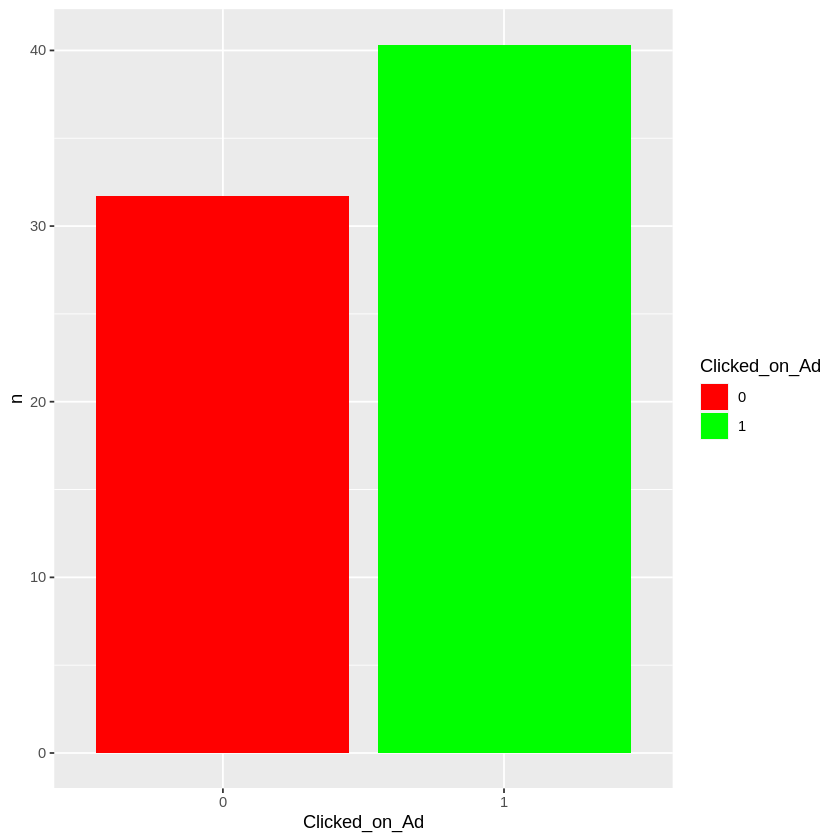

In [ ]:
#Displaying the average age of the individals who clicked the ads.
h <- ggplot(age, aes(x = `Clicked_on_Ad`, y = n))

h + geom_col(aes(fill = `Clicked_on_Ad`)) +
  scale_fill_manual(values = c("red", "green"))

The individuals who did not clicked the ad were around 32 years of age while the ones who actually clicked the ad were aroudn 40 years of age.

In [ ]:
#Grouping Number of Clicks in a country and picing the ten highest.
country_ad <- df %>% 
  group_by(Country) %>%
  summarise(n=sum(Clicked_on_Ad, na.rm=TRUE)) %>%
  arrange(desc(n))%>%
  head(10)

`summarise()` ungrouping output (override with `.groups` argument)



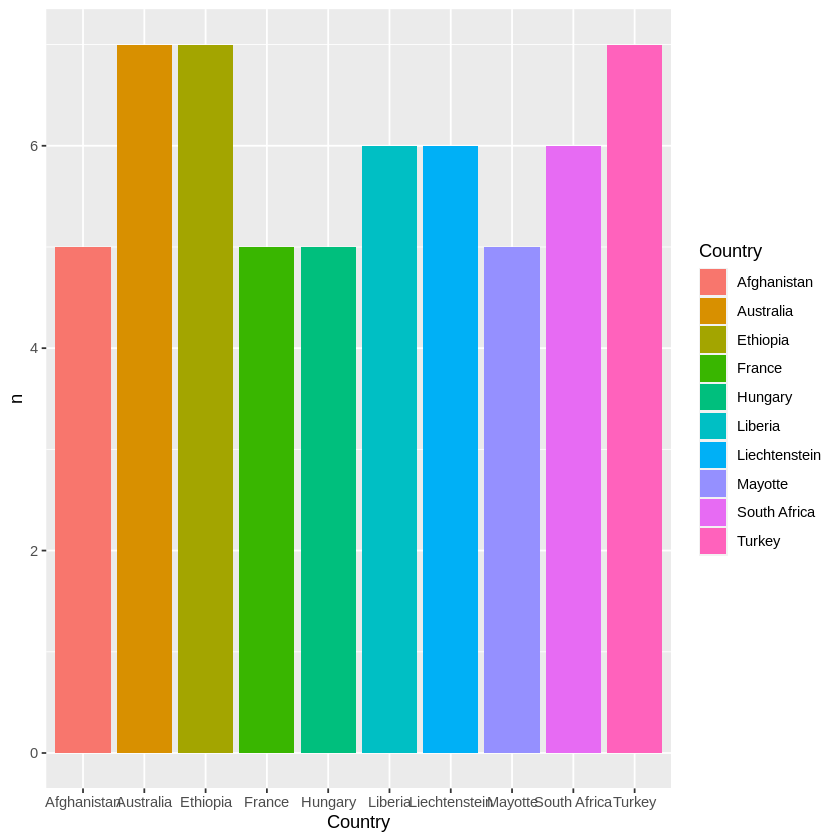

In [ ]:
#Visualizing the clicks in a country.
i <- ggplot(country_ad, aes(x = `Country`, y = n))

i + geom_col(aes(fill = `Country`)) 

The countries that had the highest click through are:


*   Autralia, Ethiopia and Turkey had the highest clicks of her ads.
*   Liechtenstein and South Africa followed as well.



In [ ]:
#Finding out the mean number of seconds an individual takes to click an ad or not
daily_time <- df %>% 
  group_by(Clicked_on_Ad) %>%
  summarise(n=mean(Time_Spent_on_Site, na.rm=TRUE)) %>%

`summarise()` ungrouping output (override with `.groups` argument)



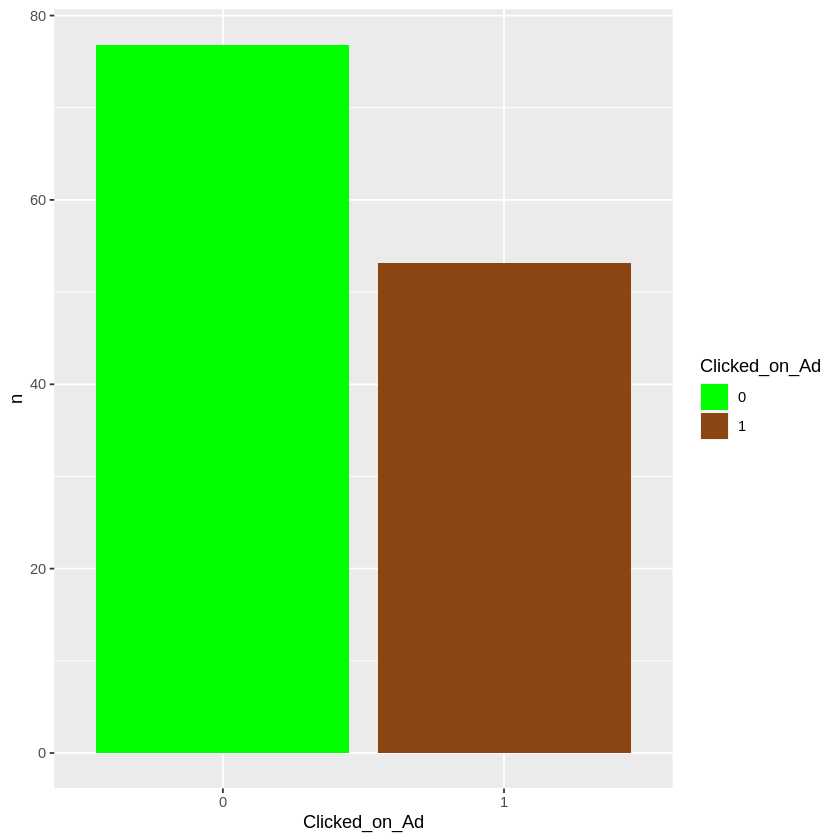

In [ ]:
#Visualizing the results.
m <- ggplot(daily_time, aes(x = `Clicked_on_Ad`, y = n))

m + geom_col(aes(fill = `Clicked_on_Ad`)) +
  scale_fill_manual(values = c("green", "chocolate4"))

An individual takes an average of 53 seconds to click and ad and an average of 76 seconds not to click an ad.

In [ ]:
#Grouping the mean area income by the Click through rate of an individual.
area_income <- df %>% 
  group_by(Clicked_on_Ad) %>%
  summarise(n=mean(Area_Income, na.rm=TRUE))

`summarise()` ungrouping output (override with `.groups` argument)



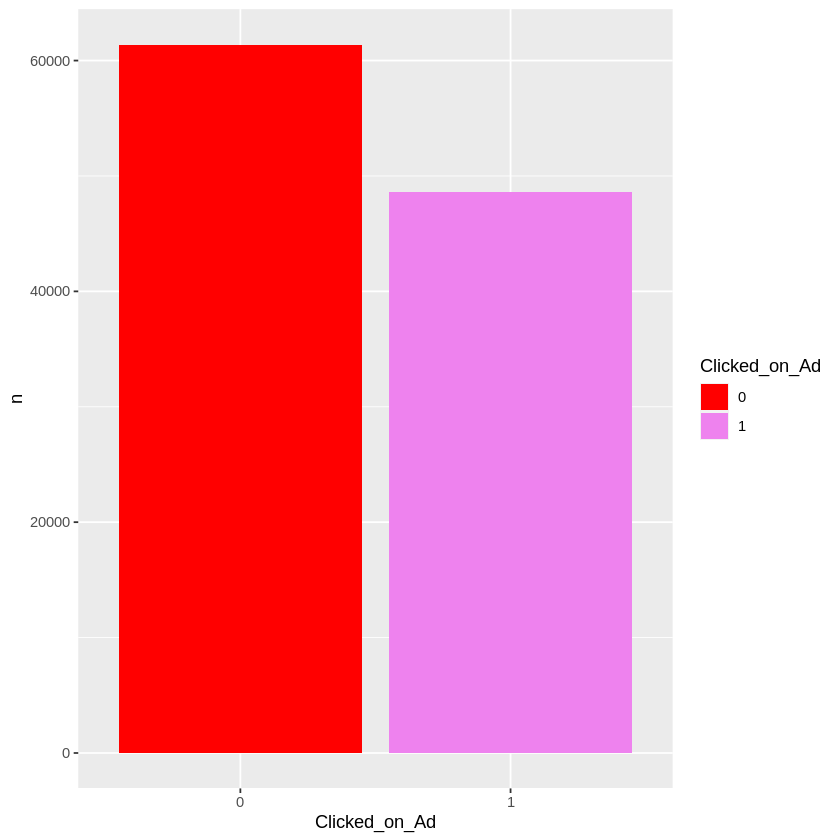

In [ ]:
#Visualzing the results.
n <- ggplot(area_income, aes(x = `Clicked_on_Ad`, y = n))

n + geom_col(aes(fill = `Clicked_on_Ad`)) +
  scale_fill_manual(values = c("red", "violet"))

Persons with an area income of around 48000 clicked the ad. Persons who did not click the ad had an area of income of around 60000.

In [ ]:
internet_usage <- df %>% 
  group_by(Clicked_on_Ad) %>%
  summarise(n=mean(Daily_Internet_Usage, na.rm=TRUE))

`summarise()` ungrouping output (override with `.groups` argument)



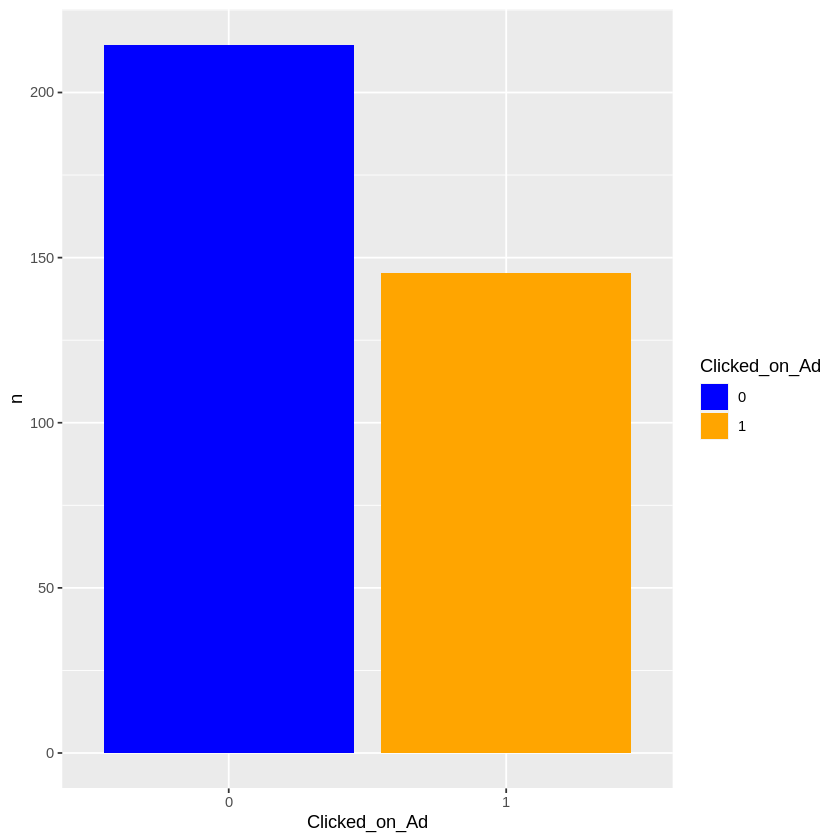

In [ ]:
o <- ggplot(internet_usage, aes(x = `Clicked_on_Ad`, y = n))

o + geom_col(aes(fill = `Clicked_on_Ad`)) +
  scale_fill_manual(values = c("blue", "orange"))

The persons who clicked the ad had an average lower internet spending than their counterparts. The persons who clicked had an daily internet spending of 145, while the ones who did not click had an average spending of 214.

In [ ]:
#Importing the necessary library to make correlation plots
library(ggcorrplot)

In [ ]:
#Subsetting numerical columns in the datatable
numerical_cols <- (colnames(df) == 'Time_Spent_on_Site' | colnames(df) == 'Age' | colnames(df) == 'Area_Income' | colnames(df) == 'Daily_Internet_Usage' | colnames(df) == 'Clicked_on_Ad')
cols <- subset(df,,numerical_cols)

In [170]:
#Finding correlations in our numerical columns.
cor(cols)

,Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Clicked_on_Ad
Time_Spent_on_Site,1.0000000,-0.3315133,0.3109544,0.5186585,-0.7481166
Age,-0.3315133,1.0000000,-0.1826050,-0.3672086,0.4925313
Area_Income,0.3109544,-0.1826050,1.0000000,0.3374955,-0.4762546
Daily_Internet_Usage,0.5186585,-0.3672086,0.3374955,1.0000000,-0.7865392
Clicked_on_Ad,-0.7481166,0.4925313,-0.4762546,-0.7865392,1.0000000


Key takeways from the correlation matrix above:


*   The Time spent on Site has a negative impact on whether one will click an ad.
*   The Daily Internet Usage has also a strong impact on whether one will click an ad or not.
*   The Time Spent on Site and the Daily Internet Usage has a positive linear relationship.
*   The Age and whether one clicked an ad has also a positive linear relationship.



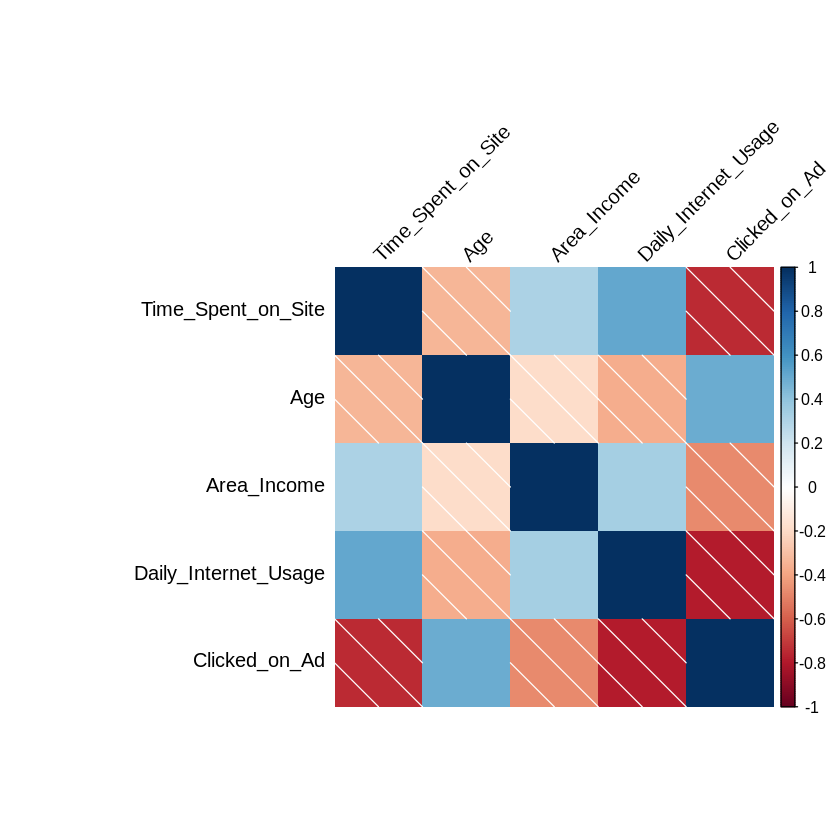

In [ ]:
#Visualizing the Correlation Matrix.
corrplot(cor(cols), method="shade", tl.col="black", tl.srt=45)

The Red areas represent the strongly negatively correlated and the Blue areas show a positive linear relationship.

In [172]:
#Getting the summary of our data table.
summary(df)

 Time_Spent_on_Site      Age         Area_Income    Daily_Internet_Usage
 Min.   :32.60      Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36      1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22      Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00      Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55      3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43      Max.   :61.00   Max.   :79485   Max.   :270.0       
     City              Gender            Country             Month          
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           